# Decision Trees

*Decision trees are an ML method applicable to classifiication or regression tasks. For prediciting the dependent variable of a certain instance, one has to navigate through the decision tree.*

*It is a __nonparametric model__, which means, that the number of parameters is not determined prior to training. A linear model is a __parametric model__. Therefore, decisions trees can easily __overfit__!*

*Important is the maximal depth of the tree, which is an indicator of tree complexity.*

*picture from: Barros, Rodgrido C., et al. "Automatic Design of Decision Tree"*

![From Barros, Rodgrido C., et al. "Automatic Design of Design Tree](tree_for_classification.png)

# Preamble

*We again strongly follow __Hands-On Machine Learning with Scikit-Learn, TensorFlow and Keras (by Aurelien Geron)__.*

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from warnings import filterwarnings
filterwarnings('ignore')

# Train a Decision Tree

Let us start with using the iris datasets:

In [43]:
from sklearn import datasets

df_iris         = pd.DataFrame(datasets.load_iris().data)
df_iris.columns = datasets.load_iris().feature_names
y_iris          = datasets.load_iris().target
# bring target variable into dataframe:
df_iris.insert(df_iris.shape[1], 'target', y_iris, True)

df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [32]:
df_iris.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [44]:
cols = ['petal length (cm)', 'petal width (cm)']
# design matrix = features
X = np.array(df_iris[cols].copy())
y = np.array(df_iris['target'])

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

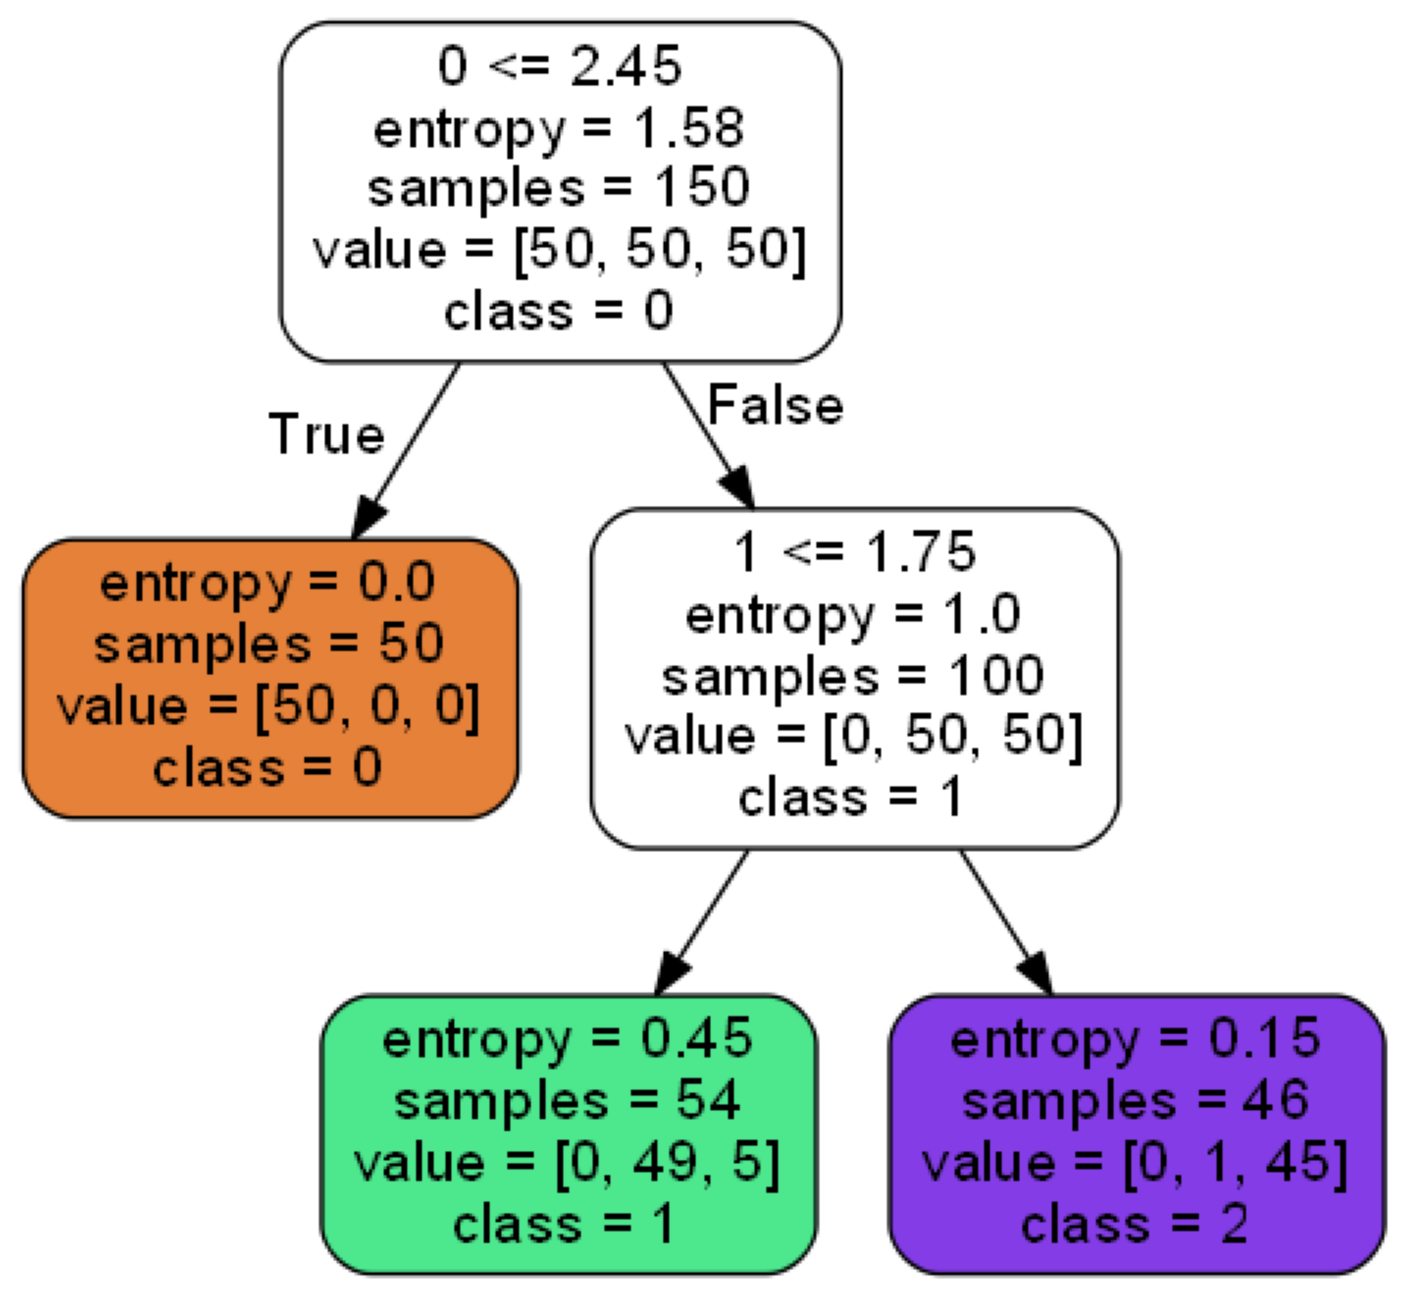

In [53]:
import treeplot
ax = treeplot.plot(tree_clf, plottype='vertical')

A Decision Tree has a lot of different parameters to trigger.

In [55]:
?DecisionTreeClassifier

# Making a prediction

Making a prediction means going through the tree from root node to leaf node.

In [51]:
tree_clf.predict([[2.55, 1.8]])

array([2])

Decision Tree measures:

*Gini impurity:*

$$ G_i = 1- \sum_{k = 1}^{n} p_{i,k}^2 $$
 with $p_{i,k}$ ratio of class $k$ instances in the i^th node. For the depth-2 left node we have
 
$$ G_2 = 1 - \left(\frac{0}{54}\right)^2 - \left(\frac{49}{54}\right)^2 - \left(\frac{5}{54}\right)^2  $$

*Entropy:*

$$ H_i = - \sum_{k=1}^{n} p_{i,k} \log_2\left( p_{i,k} \right) $$

For the depth-2 left node we habe
 
$$ H_2 = - \frac{0}{54} \log_2 \left(\frac{0}{54}\right) - \frac{49}{54} \log_2 \left(\frac{49}{54}\right) - \frac{5}{54} \log_2 \left(\frac{5}{54}\right)  $$


Entropy tends to produce slightly more balanced trees.

In [54]:
import math
-49/54 * math.log(49/54, 2) - 5/54 * math.log(5/54, 2)

0.44506485705083865

## Class Probabilities

It is easy to calculate class probabilities for decision trees:

In [56]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [57]:
49/54

0.9074074074074074

In [58]:
tree_clf.predict([[5, 1.5]])

array([1])

# Decision Boundary

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

MAX DEPTH :  2


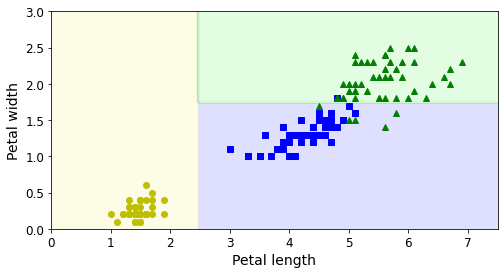

MAX DEPTH :  3


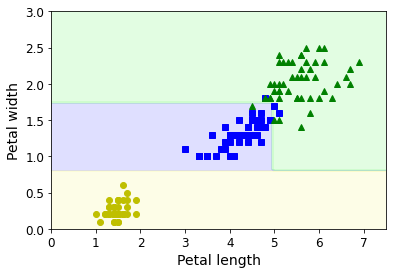

MAX DEPTH :  4


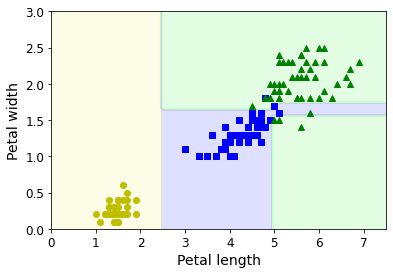

MAX DEPTH :  5


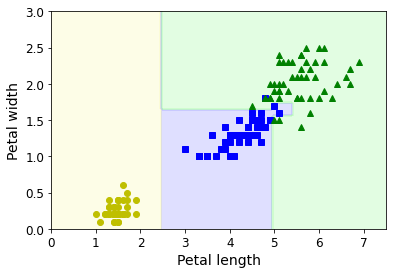

In [21]:
plt.figure(figsize=(8, 4))

for i in range(4):
    print('MAX DEPTH : ', 2+i)
    tree_clf = DecisionTreeClassifier(max_depth = 2+i, criterion = 'entropy')
    tree_clf.fit(X, y)
    plot_decision_boundary(tree_clf, X, y)
    plt.show()

# Regularization Hyperparameters

*As seen above, with the max_depth parameter we can control the complexity of the decision boundary.*

*Other hyperparameters are*

* __min_samples_split__  (minimum number off samples a node must have before it can split), 
* __min_samples_leaf__  (minimum number of samples a leaf node must have), 
* __max_leaf_nodes__ and 
* __max_features__ (maximum number of features that are evaluated for splitting at each node).

Let us use the moon dataset:

In [39]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

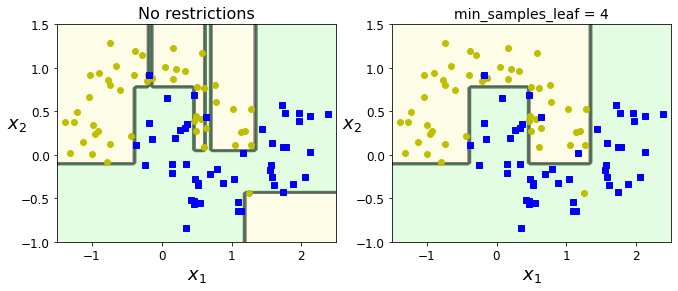

In [40]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

# Decision Tree Algorithms

## ID.3 Algorithm

## CART Algorithm

# Decision Trees for Regression

In [22]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

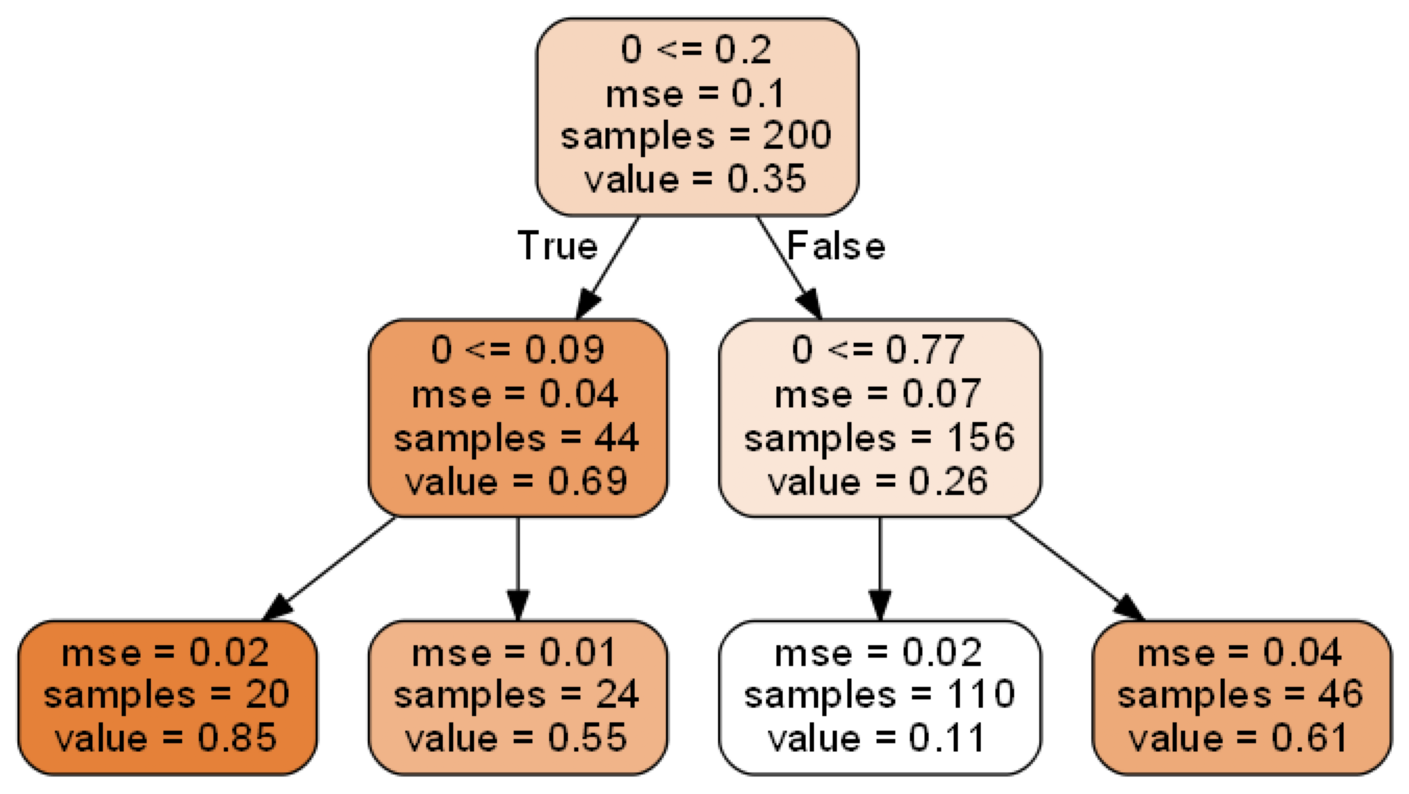

In [24]:
ax = treeplot.plot(tree_reg, plottype='vertical')

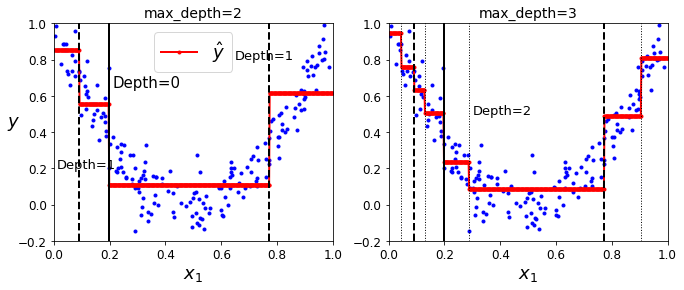

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

*Decision trees are also prone to overfitting when dealing with regression tasks.*

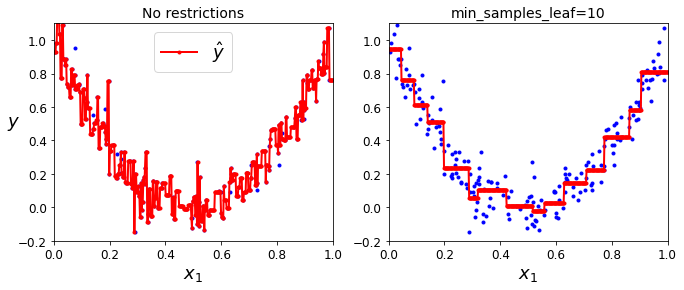

In [44]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

*Random Forests can limit the instability of decision trees by averaging predictions over many trees.*

# Decision Trees & Extrapolation

![From Müller & Guido, "Intorduction to Machine Learning with Python"](decision_tree_and_extrapolation.png)

# Ensemble Methods and Random Forests

*An ensemble of decision trees is a random forest. This is one of the most powerful machine learning algorithms available today.*

*We now look at ensemble methods like bagging, boosting and stacking.*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Voting Classifier

*Now we make an interesting observation. The prediction of many independent algoriths together give a better prediction than the individual classifiers themselves.*

*  Hard voting: Majority voting
*  Soft voting: More weight to highly confident votes

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

# # predict: logistic: 0.95 -> 1
#            random  : 0.6  -> 0
#            SVC     :       -> 1

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [28]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [29]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


For soft voting the SVC has to allow for probability estimation:

In [30]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [31]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Soft voting leads to 91.2% accuracy!

# Bagging and Pasting

*Instead of taking different algorithms, we now use the same training algorithm but train them on different random subsets of the training data.*

* Bagging: sampling with replacement
* Pasting: sampling without replacement

data set: 1,2,3...100

bagging: 1,2,2,3,10,10,12,70,70...

pasting: 1,2,3,10,12,70

In [32]:
from sklearn.ensemble import BaggingClassifier
# base classifier:
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=50,
    max_samples=100, 
    bootstrap=True, 
    n_jobs=-1,  
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


Let us compare it with one decision tree:

In [34]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


## Decision Tree vs. Bagging Classifier

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

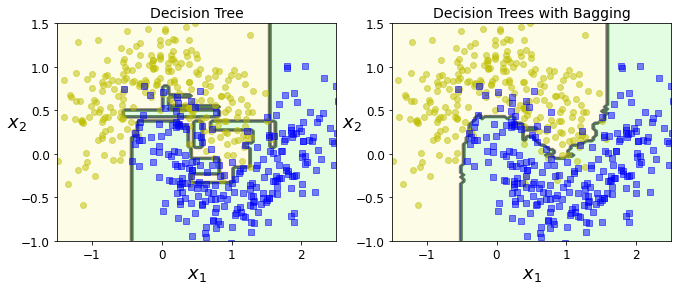

In [37]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

*The ensemble has a comparable bias but a smaller variance. The decision boundary is less irregular*

**Out-of-bag score:**

Take as validation set all data not used for training (out-of bag datapoints)

In [38]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [39]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# Random Forests

*A random forest is an ensemble of Decision Trees generally trained via the bagging methods.*

In [40]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1, 
                                 random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.912


# Feature Importance

In a logistic regression model the weights of the coefficients give the importance of the features.

*A great quality of random forests is that it is also very easy to measure the relative importance of each feature.*

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10309761228768258
sepal width (cm) 0.0261007361046454
petal length (cm) 0.4336527400683616
petal width (cm) 0.4371489115393104


Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform feature selection.